1 : What is the difference between multithreading and multiprocessing?

-   Multithreading

 1)  Concept: Runs multiple threads (lightweight processes) inside a single process.

2)  Goal: Improve performance for I/O-bound tasks (like file reading, network calls, waiting for APIs).

3)  Parallelism: Not true parallelism in Python due to the GIL (Global Interpreter Lock) — only one thread runs Python bytecode at a time.

4)  Memory: All threads share the same memory space.

    Use Case Examples:

Downloading multiple web pages.

Reading/writing multiple files.

Handling multiple client connections (in servers).



-   Multiprocessing

1)   Concept: Runs multiple processes, each with its own Python interpreter and memory space.

2)  Goal: Achieve true parallelism for CPU-bound tasks (like heavy computation, data processing, ML training).

3)  Parallelism: Yes ✅ — each process runs independently and truly in parallel on different CPU cores.

4)  Memory: Processes do not share memory (data needs to be passed using pipes or queues).

    Use Case Examples:

Image/video processing.

Data crunching, numerical simulations.

Machine learning model training.


2 :  What are the challenges associated with memory management in Python?

 Challenges Associated with Memory Management in Python

1. Reference Counting & Garbage Collection

-  Python primarily uses reference counting to keep track of objects.

-  When the reference count becomes zero, the object is deleted.

Challenge:

-  Circular references (objects referencing each other) can prevent memory from being freed automatically.

Example: Two objects holding references to each other even if not used anymore.

2. Global Interpreter Lock (GIL)

-   The GIL ensures that only one thread executes Python bytecode at a time.

Challenge:

-   Limits parallel execution even if multiple threads are used.

-   Memory management operations become serialized — this can reduce performance in multithreaded programs.

3. Fragmentation of Memory

-  Python’s memory allocator (PyMalloc) manages memory in small chunks (called blocks or arenas).

Challenge:

-  Over time, memory can become fragmented, leading to inefficient memory use and increased RAM consumption.

-  Especially visible in long-running applications or large data processing programs.

4. Objects Not Released Immediately

-  Even after deleting an object using del, memory may not be released right away.

Challenge:

-  The garbage collector decides when to actually free memory, so there’s less control.

-  Memory might appear to be "leaking" in long-running apps.

5. Large Data Structures

-  Lists, dictionaries, and sets can grow large quickly.

Challenge:

-  These structures hold references to many objects — freeing them can be expensive.

-  Deeply nested or shared references can complicate cleanup.

6. Third-Party Modules and Extensions

-  Some C/C++ extensions or libraries (like NumPy, TensorFlow) manage their own memory.

Challenge:

-  The Python garbage collector might not track memory used by such extensions.

-  Can cause hidden memory leaks if not handled properly.

7. Lack of Manual Control

-  Unlike C/C++, Python abstracts memory management, which is good for simplicity but bad for fine-tuning.

Challenge:

-  Developers cannot easily force memory compaction or control allocation behavior.



3 : Write a Python program that logs an error message to a log file when a
division by zero exception occurs.

In [2]:
import logging

# Configure logging
logging.basicConfig(filename='error.log',
                    level=logging.ERROR,
                    format='%(asctime)s - %(levelname)s - %(message)s')
try:
    # Example: Division by zero
    num1 = 10
    num2 = 0
    result = num1 / num2

except ZeroDivisionError as e:
    logging.error("Division by zero error occurred: %s", e)
    print("An error occurred! Check 'error.log' for details.")


ERROR:root:Division by zero error occurred: division by zero


An error occurred! Check 'error.log' for details.


4 : Write a Python program that reads from one file and writes its content to another file.

In [9]:
# Read from one file and write to another

# Open source file in read mode
with open("source.txt", "r") as src:
    data = src.read()  # Read all content

# Open destination file in write mode
with open("destination.txt", "w") as dest:
    dest.write(data)  # Write the content

print("File copied successfully!")


File copied successfully!


 5 : Write a program that handles both IndexError and KeyError using a try-except block.




In [10]:
# Program to handle IndexError and KeyError

try:
    # Example 1: IndexError
    my_list = [10, 20, 30]
    print(my_list[5])  # Invalid index

    # Example 2: KeyError
    my_dict = {'a': 1, 'b': 2}
    print(my_dict['c'])  # Invalid key

except IndexError:
    print("Error: List index out of range!")

except KeyError:
    print("Error: Key not found in dictionary!")

print("Program continues running smoothly...")


Error: List index out of range!
Program continues running smoothly...


6 : What are the differences between NumPy arrays and Python lists?

NumPy Arrays:


NumPy arrays are data structures provided by the NumPy library that are designed for efficient numerical computation. They store elements of the same data type (homogeneous) and are implemented in C, which makes them much faster and more memory-efficient than Python lists. NumPy arrays support vectorized operations, meaning you can perform mathematical operations on the entire array at once without using loops. They also offer a wide range of built-in mathematical and statistical functions, and they can handle multi-dimensional data such as matrices and tensors easily, making them ideal for data science, machine learning, and scientific computing.



Python Lists:


Python lists are built-in, flexible data structures that can hold elements of different data types (heterogeneous), such as integers, strings, and floats in the same list. They are easy to use and suitable for general-purpose programming tasks. However, Python lists are slower and consume more memory compared to NumPy arrays because they are implemented in Python and do not support vectorized operations. Mathematical operations on lists require explicit looping or list comprehensions. Lists are best suited for simple data storage and manipulation rather than high-performance numerical computation.

7: Explain the difference between apply() and map() in Pandas

map() in Pandas:

-  The map() function is used only with Series (one column).

-  It applies a function, dictionary, or mapping to each element in the Series.

-  It’s useful for element-wise transformations like converting values, replacing data, or applying simple functions.

In [11]:
import pandas as pd

s = pd.Series([1, 2, 3])
print(s.map(lambda x: x * 2))   # Output: [2, 4, 6]


0    2
1    4
2    6
dtype: int64


apply() in Pandas:

-  The apply() function works with both Series and DataFrames.

-  It can apply a function to each element (in a Series) or to each row/column (in a DataFrame).

-  It’s more powerful and flexible — you can use it for complex operations or custom functions.

In [12]:
import pandas as pd

df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
print(df.apply(lambda x: x * 2))
# Output:
#    A  B
# 0  2  6
# 1  4  8


   A  B
0  2  6
1  4  8


8 : Create a histogram using Seaborn to visualize a distribution.

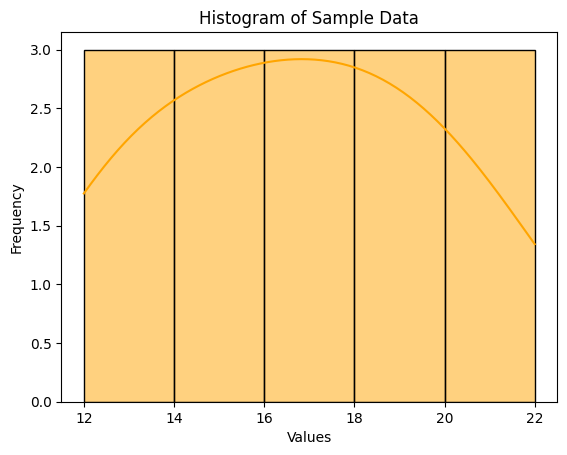

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = [12, 15, 13, 17, 19, 21, 12, 14, 18, 16, 20, 15, 17, 19, 22]

# Create histogram
sns.histplot(data, bins=5, kde=True, color='orange')

# Add titles and labels
plt.title("Histogram of Sample Data")
plt.xlabel("Values")
plt.ylabel("Frequency")

# Show the plot
plt.show()


9 : Use Pandas to load a CSV file and display its first 5 rows.

In [20]:
import pandas as pd

# Define the path to your CSV file
file_path = 'your_file_name.csv'  # Replace with the actual path/name of your file

# 1. Load the CSV file into a Pandas DataFrame
try:
    df = pd.read_csv(file_path)

    # 2. Display the first 5 rows
    print(df.head())

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: The file 'your_file_name.csv' was not found. Please check the file path.


10 : Calculate the correlation matrix using Seaborn and visualize it with a heatmap.

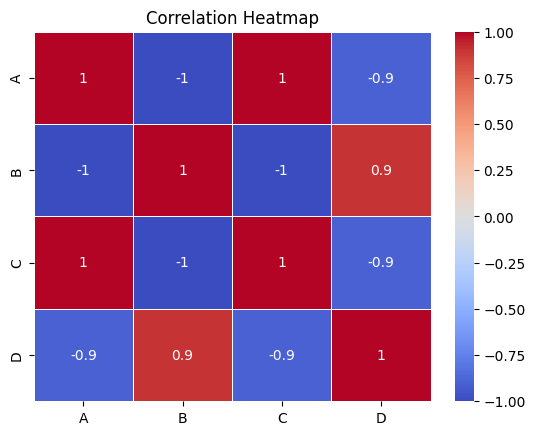

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6],
    'D': [5, 3, 4, 2, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate correlation matrix
corr_matrix = df.corr()

# Visualize correlation matrix using heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title("Correlation Heatmap")
plt.show()
